In [2]:
import numpy as np
import pandas as pd

In [3]:
iris=pd.read_csv("iris.csv")

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris=iris.drop(columns=['Id'])

In [6]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris.shape

(150, 5)

In [8]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.duplicated().sum()

3

In [10]:
iris=iris.drop_duplicates()

In [11]:
iris.shape

(147, 5)

In [12]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [14]:
iris['Species'].value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

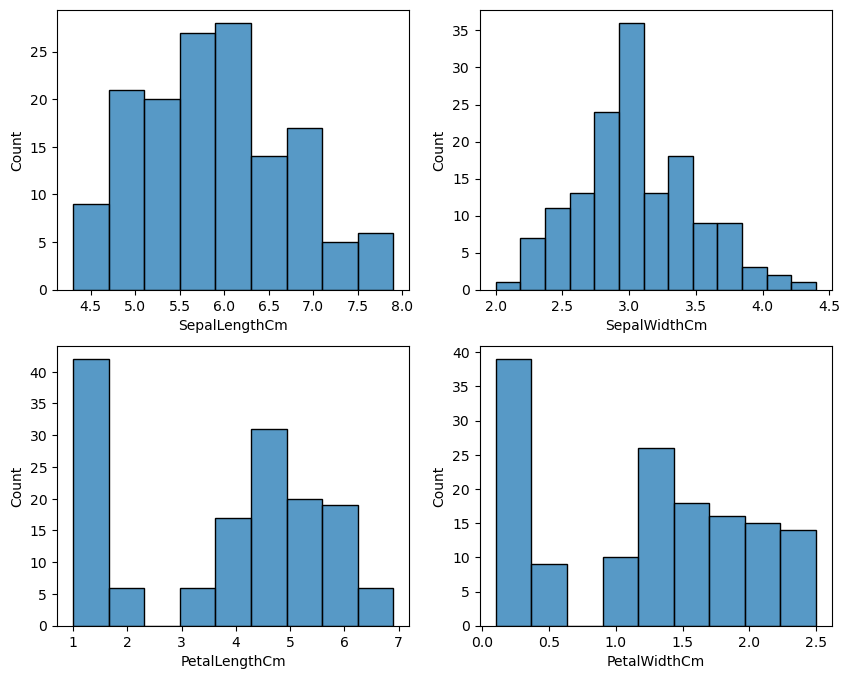

In [16]:
fig,ax=plt.subplots(2,2,figsize=(10,8))
sns.histplot(iris['SepalLengthCm'],ax=ax[0][0])
sns.histplot(iris['SepalWidthCm'],ax=ax[0][1])
sns.histplot(iris['PetalLengthCm'],ax=ax[1][0])
sns.histplot(iris['PetalWidthCm'],ax=ax[1][1])

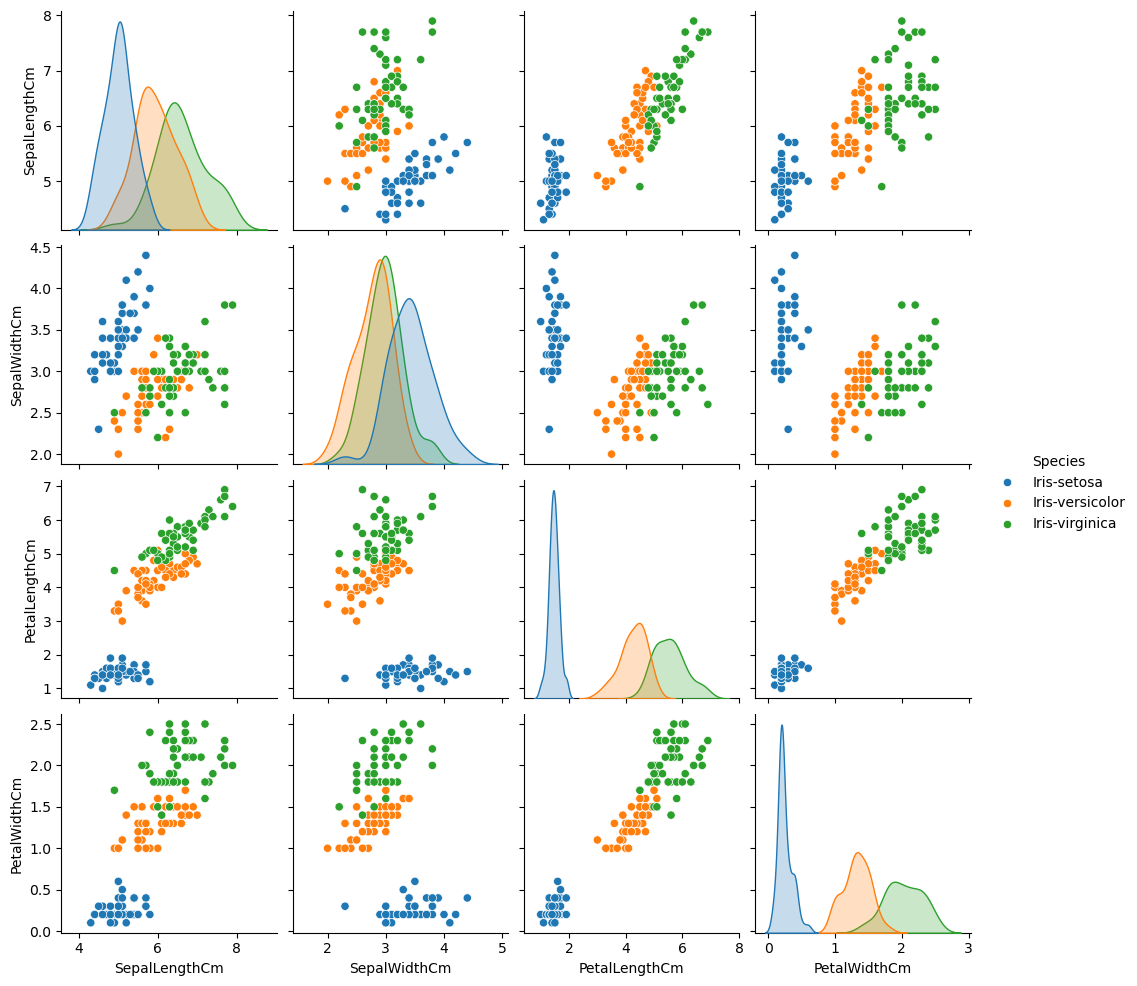

In [17]:
sns.pairplot(iris,hue='Species')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder() 

In [20]:
iris['Species']=le.fit_transform(iris['Species'])

In [21]:
iris.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
113,5.7,2.5,5.0,2.0,2
15,5.7,4.4,1.5,0.4,0
57,4.9,2.4,3.3,1.0,1
75,6.6,3.0,4.4,1.4,1
31,5.4,3.4,1.5,0.4,0


<Axes: >

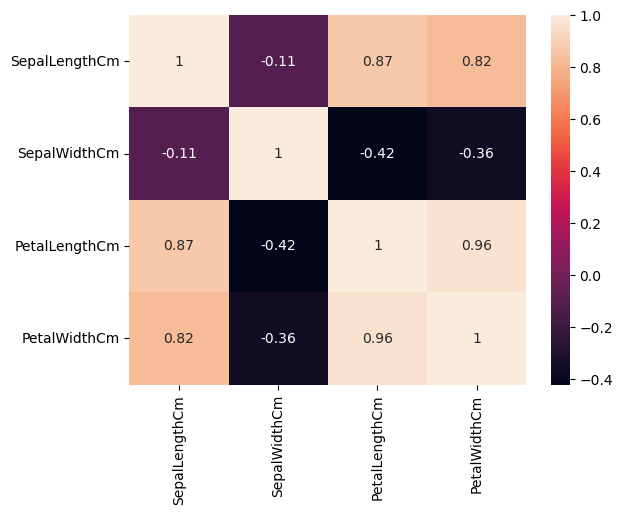

In [22]:
sns.heatmap(iris.iloc[:,0:-1].corr(),annot=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
X=iris.drop(columns=['Species'])
y=iris['Species']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit on training data
X_test_scaled = scaler.transform(X_test)        # Transform test data

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

In [28]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
y_pred=lr.predict(X_test_scaled)

In [30]:
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred)

In [31]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [48]:
def predict_iris_single(SL,SW,PL,PW):
     sample= pd.DataFrame([[SL, SW, PL, PW]], columns=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
     sample_scaled=scaler.transform(sample)
     prediction=lr.predict(sample_scaled)
     return prediction[0]

    

In [50]:
result=predict_iris_single(6.9,3.1 ,5.4,2.1)
print(result)

2
